Useful links:
- https://docs.nvidia.com/nsight-compute/NsightComputeCli/index.html#nvprof-metric-comparison
- https://docs.nvidia.com/cuda/profiler-users-guide/index.html#metrics-reference-7x
- https://canvas.kth.se/courses/36161/assignments/223741
- https://canvas.kth.se/courses/36161/pages/tutorial-timing-your-kernel-cpu-timer-and-nvprof?module_item_id=561394

In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Sun Jan  8 00:20:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_4/ex_4'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_4/ex_4
hw4_ex4_heat_equation_with_using_nvidia_libraries.ipynb
lab4-ex4
lab4-ex4.cu
lab4-ex4-template.cu
program_output_question1.txt
program_output_question2.txt
tmp.txt


In [ ]:
!nvcc -arch=sm_75 -lcublas -lcusparse ./lab4-ex4.cu -o lab4-ex4

In [ ]:
!./lab4-ex4 32 1
#!printf "set cuda memcheck on\nset cuda api_failures stop\ncatch throw\nr\nbt\ninfo locals\nthread 1\nbt\n" > ./tmp.txt
#!cuda-gdb -batch -x tmp.txt --args ./lab4-ex4 32 1
#!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab4-ex4 32 1
#!nvprof ./lab4-ex4 32 1

The X dimension of the grid is 32 
The number of time steps to perform is 1 
Timing - Allocating device memory. 		Elasped 108146 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 990 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 1 microseconds 
Timing - Initializing memory on the host. 		Elasped 1 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 205 microseconds 
Timing - Computing the SMPV. 			Elasped 227 microseconds 
The relative error of the approximation is 3.469692


## Question 1

In [ ]:
!for i in {2..20..1}; do ./lab4-ex4 $((2 ** i)) 100; done

The X dimension of the grid is 4 
The number of time steps to perform is 100 
Timing - Allocating device memory. 		Elasped 85427 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 47 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 1 microseconds 
Timing - Initializing memory on the host. 		Elasped 1 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 310 microseconds 
Timing - Computing the SMPV. 			Elasped 588 microseconds 
The relative error of the approximation is 0.000000
The X dimension of the grid is 8 
The number of time steps to perform is 100 
Timing - Allocating device memory. 		Elasped 81150 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 45 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 1 microseconds 
Timing - Initializing memory on the host. 		Elasped 1 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 302 microseconds 
Timing - Computi

In [ ]:
import re

# Regular expressions
regex_dimX = "The X dimension of the grid is (.*)"
regex_smpv = "Timing - Computing the SMPV. \t\t\tElasped (.*) microseconds"

dimX = []
smpv_times = []
with open("./program_output_question1.txt") as file:
    for line in file:
        line_str = line.rstrip()
        dimX_re = re.search(regex_dimX, line_str)
        if dimX_re:
            dimX.append(float(dimX_re.group(1)))
        smpv_re = re.search(regex_smpv, line_str)
        if smpv_re:
            smpv_times.append(float(smpv_re.group(1)) * 1e-6)

#print(dimX)
#print(smpv_times)

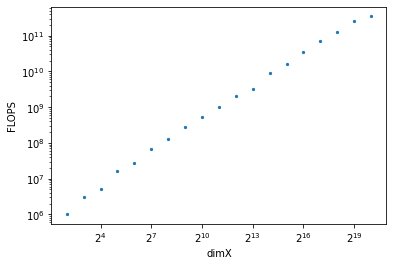

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_timesteps = 100
flops = [num_timesteps * (3 * dim - 6) / time for dim, time in zip(dimX, smpv_times)]

fig, ax = plt.subplots()
ax.scatter(dimX, flops, s=5)
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_xlabel('dimX')
ax.set_ylabel('FLOPS')
plt.show()

## Question 2

In [ ]:
!for i in {100..10000..100}; do ./lab4-ex4 128 $i; done

The X dimension of the grid is 128 
The number of time steps to perform is 100 
Timing - Allocating device memory. 		Elasped 84243 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 83 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 3 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 319 microseconds 
Timing - Computing the SMPV. 			Elasped 591 microseconds 
The relative error of the approximation is 3.318021
The X dimension of the grid is 128 
The number of time steps to perform is 200 
Timing - Allocating device memory. 		Elasped 101266 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 1113 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 3 microseconds 
Timing - Initializing memory on the host. 		Elasped 1 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 351 microseconds 
Timing - 

Extract the relative errors and the corresponding number of time steps from the output of the program.

In [ ]:
import re

# Regular expression for identifying floating point numbers
regex_float = "[+-]?[0-9]+\.[0-9]+"

num_timesteps = []
relative_errors = []
with open("./program_output_question2.txt") as file:
    for line in file:
        line_str = line.rstrip()
        relative_error = re.search(regex_float, line_str)
        if relative_error:
            relative_errors.append(float(relative_error.group(0)))
        split = line_str.rsplit("The number of time steps to perform is ")
        if len(split) != 1:
            num_timesteps.append(int(split[-1]))

#print(num_timesteps)
#print(relative_errors)

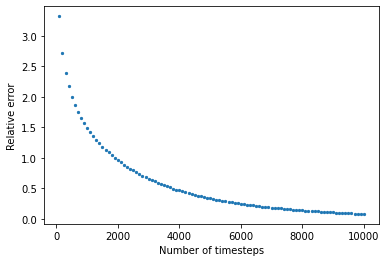

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(num_timesteps, relative_errors, s=5)
plt.xlabel('Number of timesteps')
plt.ylabel('Relative error')
plt.show()

## Question 3

Set `#define PREFETCH 0` to disable prefetching. Set `#define PREFETCH 1` to enable prefetching. 



In [ ]:
# Without prefetching
!nvcc -arch=sm_75 -lcublas -lcusparse ./lab4-ex4.cu -o lab4-ex4
!nvprof ./lab4-ex4 128 1000

The X dimension of the grid is 128 
The number of time steps to perform is 1000 
==5511== NVPROF is profiling process 5511, command: ./lab4-ex4 128 1000
Timing - Allocating device memory. 		Elasped 289831 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 85 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Computing the SMPV. 			Elasped 13922 microseconds 
The relative error of the approximation is 1.488118
==5511== Profiling application: ./lab4-ex4 128 1000
==5511== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   75.03%  91.707ms      2004  45.762us  29.759us  53.310us  void nrm2_kernel<double, double, double, int=0, int=0, int=128>(cublasNrm2Params<double, double>)
                   12.80%  15.647ms      1000  15.646us  11.455us  18.848us  _ZN8cusparse21load_balancing_kernelILj512ELj4ELm16384EiiNS_7CsrmvOpILi512EdLb0EEEJKiKdS4_didEEEvPKT3_T2_S5_S

In [ ]:
# With prefetching
!nvcc -arch=sm_75 -lcublas -lcusparse ./lab4-ex4.cu -o lab4-ex4
!nvprof ./lab4-ex4 128 1000

The X dimension of the grid is 128 
The number of time steps to perform is 1000 
==5769== NVPROF is profiling process 5769, command: ./lab4-ex4 128 1000
Timing - Allocating device memory. 		Elasped 210158 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 64 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 2 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 337 microseconds 
Timing - Computing the SMPV. 			Elasped 13892 microseconds 
The relative error of the approximation is 1.488118
==5769== Profiling application: ./lab4-ex4 128 1000
==5769== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   75.13%  90.753ms      2004  45.285us  37.471us  55.263us  void nrm2_kernel<double, double, double, int=0, int=0, int=128>(cublasNrm2Params<double, double>)
                   12.88%  15.561ms    